### Acknowledgement
Name: Zuha Aqib     
ERP ID: 26106    
Section: 10am Miss Solat     
Date: (written on) 08-Mar-25    

code has been taken from Miss Solat's code files and written by Zuha themselves. 

In [528]:
from datetime import datetime
print("Last time code executed:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Last time code executed: 2025-03-09 15:54:18


In [529]:
erp = 26106 
# will be referenced later on in the code when we use it for random_state
erp

26106

# Imports
here we import all the necessary libraries and modules

In [ ]:
# to load the dataset
import warnings
warnings.filterwarnings('ignore')

# to make the file of wss, sil scores open immediately
import os

# to handle the data and perform numerical operations on it
import pandas as pd
import numpy as np

# to do natural language processing
import nltk

# preprocessing: to clean the data
import re

# preprocessing: stop words removal
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# preprocessing: words tokenization
from nltk.tokenize import word_tokenize

# preprocessing: stemmming and lemmatization
from nltk.stem import WordNetLemmatizer

# model running
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# clustering: k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to plot the graph
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns

# Time Displayer
this code is a function that we will call at multiple instances of the code to see how long it took to run the code to see when it ran

In [531]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Load the Dataset
Here we load the dataset from a csv file and then save it into a variable

In [532]:
dummy_dataframe = pd.read_csv("dataset/news_Feb_14.csv")
dummy_dataframe = dummy_dataframe.iloc[:, 0]  # Select only the headline column
documents = dummy_dataframe.tolist()  # Convert to list
documents

['ECC endorses purchase of $582mn capital shares in BRICS’s New Development Bank',
 'Netanyahu’s statement to establish Palestinian state in Saudi Arabia irresponsible, provocative: FO',
 'India, US agree to resolve trade and tariff rows after Trump-Modi talks',
 'Aurangzeb discusses Pakistan’s structural reforms with IFC chief',
 'HBL, S&P Global launch Pakistan’s first manufacturing PMI',
 'KSE-100 closes 479 points lower as late-session selling erases intra-day gains',
 'PPL executes agreements for Sui Gas Field operations',
 'Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan',
 'Rupee records marginal improvement against US dollar',
 'At least 9 dead, 7 injured in Balochistan’s Harnai blast',
 'Gold adds to record rally, reaches Rs306,200 per tola in Pakistan',
 'IMF’s 2024 Article IV report, and debate on inflation—I',
 'Pakistan CPI 2024 – deep-rooted corruption persists',
 '‘Like a wormhole’: Musk promises ‘Dubai Loop’ tunnel network',
 'Reforming 

In [533]:
original_headlines = documents.copy()

# Preprocessing
here we perform the preprocessing of data like:
- lowercase text
- stopword removal
- stemming or lemmatization
- n-grams

## Lowercase Conversion
here we convert our text to lowercase

In [534]:
documents = [document.lower() for document in documents]

print("Finished executing at:", get_current_datetime())
documents

Finished executing at: 2025-03-09 15:54:18


['ecc endorses purchase of $582mn capital shares in brics’s new development bank',
 'netanyahu’s statement to establish palestinian state in saudi arabia irresponsible, provocative: fo',
 'india, us agree to resolve trade and tariff rows after trump-modi talks',
 'aurangzeb discusses pakistan’s structural reforms with ifc chief',
 'hbl, s&p global launch pakistan’s first manufacturing pmi',
 'kse-100 closes 479 points lower as late-session selling erases intra-day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistan’s harnai blast',
 'gold adds to record rally, reaches rs306,200 per tola in pakistan',
 'imf’s 2024 article iv report, and debate on inflation—i',
 'pakistan cpi 2024 – deep-rooted corruption persists',
 '‘like a wormhole’: musk promises ‘dubai loop’ tunnel network',
 'reforming 

## Data Cleaning
here we clean the data

In [535]:
import re
import unicodedata

def clean_text(text):
    text = text.encode('ascii', 'ignore').decode()  # Remove non-ASCII characters
    text = unicodedata.normalize("NFKD", text)  # Normalize Unicode text
    
    # Separate numbers attached to words
    text = re.sub(r'(?<=\d)(?=[a-zA-Z])', ' ', text)  # number-word
    text = re.sub(r'(?<=[a-zA-Z])(?=\d)', ' ', text)  # word-number
    
    text = text.replace("-", " ") # replace hyphens with spaces to tokenize the numbers and words
    text = re.sub(r'[^\w\s,]', '', text)  # Remove everything except words, numbers, and commas
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    
    return text

In [536]:
documents = [clean_text(text) for text in documents]
documents

['ecc endorses purchase of 582 mn capital shares in bricss new development bank',
 'netanyahus statement to establish palestinian state in saudi arabia irresponsible, provocative fo',
 'india, us agree to resolve trade and tariff rows after trump modi talks',
 'aurangzeb discusses pakistans structural reforms with ifc chief',
 'hbl, sp global launch pakistans first manufacturing pmi',
 'kse 100 closes 479 points lower as late session selling erases intra day gains',
 'ppl executes agreements for sui gas field operations',
 'hubco green, pso collaborate to setup ev charging infrastructure across pakistan',
 'rupee records marginal improvement against us dollar',
 'at least 9 dead, 7 injured in balochistans harnai blast',
 'gold adds to record rally, reaches rs 306,200 per tola in pakistan',
 'imfs 2024 article iv report, and debate on inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like a wormhole musk promises dubai loop tunnel network',
 'reforming pension funds i

## Stop Words Removal
here we remove stop words. we have three options of:
- either declaring all possible stop words and then iteratively checking each word in the document if its a stop word and then adding the non-stop words. 
```
sw = ["from","of","and", "on","for", "the","have","a","be","to","in","will","if","by","into","as"]
docs_list = []
for d in document: 
    d_nlp = nlp(d.lower())
    t_list = []
    for token in d_nlp:
        tok_lem = str(token.lemma_)
        if (tok_lem not in sw):
            t_list.append(tok_lem)
    str_ = ' '.join(t_list) 
    docs_list.append(str_)
docs_list
```
However this is not a good practice. 
- pulling stop words from ```ntlk``` library: 
```
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documents_no_stopwords = [" ".join([word for word in doc.split() if word not in stop_words]) 
```
However after running this code it didnt not remove stop words thus i removed it
- intializing stop_words in ```CountVectorizer()``` however here we are not using it
- using the ```ENGLISH_STOP_WORDS``` in ```sklearn```
```
tokens = [word for word in tokens if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS]  
```
Lets try it and see it how it goes.

In [537]:
# Tokenize each document
tokenized_docs = [word_tokenize(doc) for doc in documents] 

# Remove stop words
filtered_docs = [[word for word in doc if word not in stopwords.words('english') and word not in ENGLISH_STOP_WORDS] for doc in tokenized_docs]

# Convert back to sentences if needed
documents = [" ".join(doc) for doc in filtered_docs]

documents

['ecc endorses purchase 582 mn capital shares bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff rows trump modi talks',
 'aurangzeb discusses pakistans structural reforms ifc chief',
 'hbl , sp global launch pakistans manufacturing pmi',
 'kse 100 closes 479 points lower late session selling erases intra day gains',
 'ppl executes agreements sui gas field operations',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee records marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold adds record rally , reaches rs 306,200 tola pakistan',
 'imfs 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promises dubai loop tunnel network',
 'reforming pension funds pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judges',
 '

## Reduction
here we change words to a smaller common form instead of the 's. We do this using two ways:
- stemming
- lemmatization

here we perform lemmatization as in the previous assignment, lemmatization had worked much better

### Lemmatization
this also reduces words to their singular form and is said to be better as it only reduces to words in the dictionary. after our 48 trials in the previous assignment, lemmatization was much better.

In [538]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_doc(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [539]:
documents = [lemmatize_doc(doc) for doc in documents]
documents

['ecc endorses purchase 582 mn capital share bricss new development bank',
 'netanyahus statement establish palestinian state saudi arabia irresponsible , provocative fo',
 'india , agree resolve trade tariff row trump modi talk',
 'aurangzeb discusses pakistan structural reform ifc chief',
 'hbl , sp global launch pakistan manufacturing pmi',
 'kse 100 close 479 point lower late session selling erases intra day gain',
 'ppl executes agreement sui gas field operation',
 'hubco green , pso collaborate setup ev charging infrastructure pakistan',
 'rupee record marginal improvement dollar',
 '9 dead , 7 injured balochistans harnai blast',
 'gold add record rally , reach r 306,200 tola pakistan',
 'imf 2024 article iv report , debate inflationi',
 'pakistan cpi 2024 deep rooted corruption persists',
 'like wormhole musk promise dubai loop tunnel network',
 'reforming pension fund pakistan sustainable approach',
 'cjp afridi administers oath newly appointed sc judge',
 'solar panel import 8

## N-Grams
here we decide how we want the words to be tokenized, either they are
- unigram: singular
- bigram: pairs (doubular)

for this assignment, we will focus on unigrams.

In [540]:
# because we want unigrams, we DO NOT have to do anything and we will leave it the way it is

# Vectorization
here we convert the text to numerical format for the model to understand it. we have four ways to do it:
- word2Vec
- doc2vec

in this code we are exploring the first method

## Word2Vec
in word2vec we have two methods:
- cbow architecture (target is predicted by context)
- skipgram (target predicts context)

In [541]:
# for sg variable
# sg = 0 # CBOW
sg = 1 # Skip-Gram

if sg == 0:
    model_type = 'CBOW'
else:
    model_type = 'Skipgram'

print(f"sg={sg}, model={model_type}")

sg=1, model=Skipgram


### Variables to set
here we set variables like vector_size, window_size, count of epochs etc. we define them here so that in the code we dont have to change them. We can easily change them here and the code will change accordingly.

one thing to note here is that before starting the assignment i will make a list of each variable and what i want to test. then i will iterate over each variable keeping rest fixed, and write a loop to iterate over that variable and then i will select that as best. then for the next i will use its list but that previous one will be in its best. this will help me run as many things as i want in one code run.

In [542]:
vector_sizes = [50, 100, 150, 200, 250, 300]
selected_vector_size = vector_sizes[0]

In [543]:
windows = [3, 5, 7, 10, 12, 15, 20]
# windows = [8, 9, 10, 11, 12]
selected_window = windows[0]

In [544]:
epochs = [50, 100, 150, 200, 250]
# epochs = [5, 10, 20, 30, 40, 50, 60]
selected_epoch = epochs[0]

### Code declaration
here we declare our code using the following syntax

In [545]:
def get_avg_word2vec(tokens, model, vector_size=300):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size) 

In [546]:
def run_word2vec (docs, vector_size, window_size, epoch):
    word2vec_model = Word2Vec(
        sentences=docs,                        # Tokenized text
        vector_size=vector_size,           # Each word is represented by a x-dimensional vector
        window=window_size,                     # Context window size
        min_count=1,                                # Ignores words that appear less than 'min_count' times
        workers=4,                                  # Number of CPU cores used
        sg=sg,                   
        epochs=epoch                       # Number of training iterations
    )
    # print(word2vec_model)
    
    # Convert the list to a Pandas Series
    documents_series = pd.Series(docs)

    docs = documents_series.apply(lambda x: get_avg_word2vec(x, word2vec_model))    
    docs = np.array(docs.tolist())
    
    # print(docs)
    
    return docs

# K Means Clustering
here we cluster the documents into similar categories using k means clustering algorithm. we will be testing the algorithm for three values of k: 5, 9 and 13

In [547]:
def display_k_means(k, data):
    print(f"Displaying {k} start time:", get_current_datetime())
    
    svd = TruncatedSVD(n_components=2, random_state=42)
    data = svd.fit_transform(data)
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    # Convert to DataFrame for visualization
    df_viz = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Cluster': labels})

    # Scatter plot of clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_viz, x='X', y='Y', hue='Cluster', palette='tab10', s=100, edgecolor='black')
    plt.title("K-Means Clustering Visualization (2D Projection)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()
    
    print("Finished displaying at:", get_current_datetime(), "\n")

In [548]:
def run_k_means(k, data, results, vector_size, window, epoch):
    print(f"Executing {k} start time:", get_current_datetime())
    
    kmeans = KMeans(n_clusters=k, random_state=erp)
    labels = kmeans.fit_predict(data)
    
    wss = kmeans.inertia_  # Within-Cluster Sum of Squares
    silhouette_avg = silhouette_score(data, labels)  # Silhouette Score
    
    print(f"K={k}: Silhouette Score and WSS={silhouette_avg:.4f}\t{wss:.4f}")
    
    results.append([k, f'Word2Vec', vector_size, window, epoch, model_type, silhouette_avg, wss])
    
    # Create a DataFrame to store headlines with their assigned clusters
    df_clusters = pd.DataFrame({'Headline': original_headlines, 'Cluster': labels})

    # Display sample headlines per cluster
    for cluster in range(k):
        print(f"\nCluster {cluster}:")
        sample_headlines = df_clusters[df_clusters["Cluster"] == cluster].sample(n=min(5, len(df_clusters[df_clusters["Cluster"] == cluster])), random_state=erp)
        for idx, row in sample_headlines.iterrows():
            print(f"- {row['Headline']}")
    
    display_k_means(k, data)
    
    print("Finished executing at:", get_current_datetime(), "\n")
    
    return silhouette_avg, wss

## Code Running
here we run the code in a for-loop, because we have many variables we need to test with k-means. thus we test them here.

In [549]:
copy_of_docs = documents

In [550]:
window = selected_window
epoch = selected_epoch
# vector_size = selected_vector_size
# the variable that is commented means that is the variable being tested

In [551]:
# define a output that will save each case WSS and silhoutee so that it can be saved into a csv file later on
results = []

In [552]:
# define an output that will save each WSS with its k so that we can plot a scree plot later on
wss_scores = []

In [553]:
# define a variable that will save the best combination for reference at the end
best_combination = []
best_WSS = 100000000000000000000000000 # we want lowest wss so we start with large value
best_Sil = 0    # we want max sil so we start with small value

In [554]:
def run_combinations(k, best_combination, best_Sil, best_WSS):
    sum_wss = 0
    count_wss = 0

    for vector_size in vector_sizes:
        print("Executed at:", get_current_datetime(), "\n")
        documents = run_word2vec(copy_of_docs, vector_size, window, epoch)
        print(f"sg={sg}, Vector_Size={vector_size}, Window={window}, Epoch={epoch}")
        print("Finished displaying at:", get_current_datetime(), "\n")
        sil, wss = run_k_means(k, documents, results, vector_size, window, epoch)
        
        # sum the wss to find average for elbow plot
        sum_wss += wss
        count_wss += 1
        
        # compute max(sil, best_sil) and min(wss, best_wss) to find the BEST
        if sil > best_Sil and wss < best_WSS:
            best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
            best_WSS = wss
            best_Sil = sil
        else:
            # if best not found, pick if WSS is best however SIL is not best but it should be within 0.05 range
            sil_diff = best_Sil - sil
            wss_diff = best_WSS - wss
            if sil_diff >= 0 and sil_diff < 0.05 and wss_diff > 0:
                best_combination = [k, "word", model_type, vector_size, window, epoch, sil, wss]
                best_WSS = wss
                best_Sil = sil

    # once all combinations are tested, compute average and append that for elbow plots for that k
    avg_wss = sum_wss / count_wss
    wss_scores.append([k, avg_wss])
    
    return best_combination, best_Sil, best_WSS

2025-03-09 15:54:20,526 : INFO : collecting all words and their counts
2025-03-09 15:54:20,526 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:20,527 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:20,530 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:20,533 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:20,534 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:20.534697', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:20,535 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:54:20 



2025-03-09 15:54:20,726 : INFO : EPOCH 6: training on 24723 raw words (4592 effective words) took 0.0s, 194813 effective words/s
2025-03-09 15:54:20,746 : INFO : EPOCH 7: training on 24723 raw words (4704 effective words) took 0.0s, 359969 effective words/s
2025-03-09 15:54:20,773 : INFO : EPOCH 8: training on 24723 raw words (4669 effective words) took 0.0s, 265320 effective words/s
2025-03-09 15:54:20,820 : INFO : EPOCH 9: training on 24723 raw words (4728 effective words) took 0.0s, 164599 effective words/s
2025-03-09 15:54:20,848 : INFO : EPOCH 10: training on 24723 raw words (4677 effective words) took 0.0s, 218335 effective words/s
2025-03-09 15:54:20,873 : INFO : EPOCH 11: training on 24723 raw words (4632 effective words) took 0.0s, 381203 effective words/s
2025-03-09 15:54:20,903 : INFO : EPOCH 12: training on 24723 raw words (4697 effective words) took 0.0s, 230952 effective words/s
2025-03-09 15:54:20,932 : INFO : EPOCH 13: training on 24723 raw words (4593 effective words) 

sg=1, Vector_Size=50, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:21 

Executing 5 start time: 2025-03-09 15:54:21
K=5: Silhouette Score and WSS=0.1160	2.1833

Cluster 0:
- Supreme Court updates seniority list with new judges
- Pakistan’s greatest ODI chases: A look back after historic win over South Africa
- Commissioner chairs meeting to review monthly performance of Polio team
- Afghanistan — the perils of cuddling India
- Senate Dy Chairman, Balochistan CM discuss development projects

Cluster 1:
- Crude Oil prices rebound with slight gain amid US Tariff delay, strong demand
- Rupee records marginal improvement against US dollar
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- Lexi Minetree cast as Elle Woods in ‘Legally Blonde’ prequel on Prime Video
- ‘We risk losing hold on reality’: Scarlett Johansson slams AI video of stars protesting against Kanye

Cluster 2:
- Azaan Sami Khan pens birthday note for daughter
- Ishaq Dar to visit USA for 

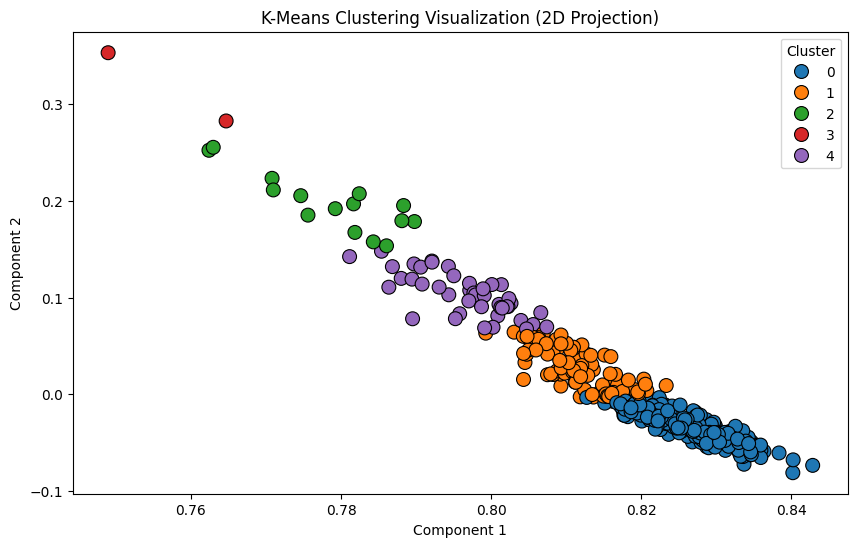

2025-03-09 15:54:21,937 : INFO : collecting all words and their counts
2025-03-09 15:54:21,938 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:21,939 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:21,943 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:21,944 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:21,945 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:21.945303', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:21,946 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:21 

Finished executing at: 2025-03-09 15:54:21 

Executed at: 2025-03-09 15:54:21 



2025-03-09 15:54:22,143 : INFO : EPOCH 10: training on 24723 raw words (4720 effective words) took 0.0s, 360336 effective words/s
2025-03-09 15:54:22,163 : INFO : EPOCH 11: training on 24723 raw words (4678 effective words) took 0.0s, 377136 effective words/s
2025-03-09 15:54:22,180 : INFO : EPOCH 12: training on 24723 raw words (4676 effective words) took 0.0s, 444876 effective words/s
2025-03-09 15:54:22,196 : INFO : EPOCH 13: training on 24723 raw words (4743 effective words) took 0.0s, 502474 effective words/s
2025-03-09 15:54:22,213 : INFO : EPOCH 14: training on 24723 raw words (4664 effective words) took 0.0s, 462107 effective words/s
2025-03-09 15:54:22,228 : INFO : EPOCH 15: training on 24723 raw words (4744 effective words) took 0.0s, 453776 effective words/s
2025-03-09 15:54:22,242 : INFO : EPOCH 16: training on 24723 raw words (4710 effective words) took 0.0s, 571075 effective words/s
2025-03-09 15:54:22,256 : INFO : EPOCH 17: training on 24723 raw words (4684 effective wor

sg=1, Vector_Size=100, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:22 

Executing 5 start time: 2025-03-09 15:54:22
K=5: Silhouette Score and WSS=0.1128	2.1281

Cluster 0:
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Jisoo returns with earthquake music video from new mini-album AMORTAGE on Valentine’s Day
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album
- Punjab law minister blames ‘complacent’ law officers for court summons to secretaries

Cluster 1:
- Gold price soars by Rs2,500 per tola
- Pakistan CPI 2024 – deep-rooted corruption persists
- IMF’s 2024 Article IV report, and debate on inflation—I
- US regulator opens probe into 129,092 Honda vehicles over camera failure
- Excellence Over Perfection: Highlights from the ADA Awards 2025

Cluster 2:
- Deepika Padukone talks exam stress, mental health
- Aurat March ki

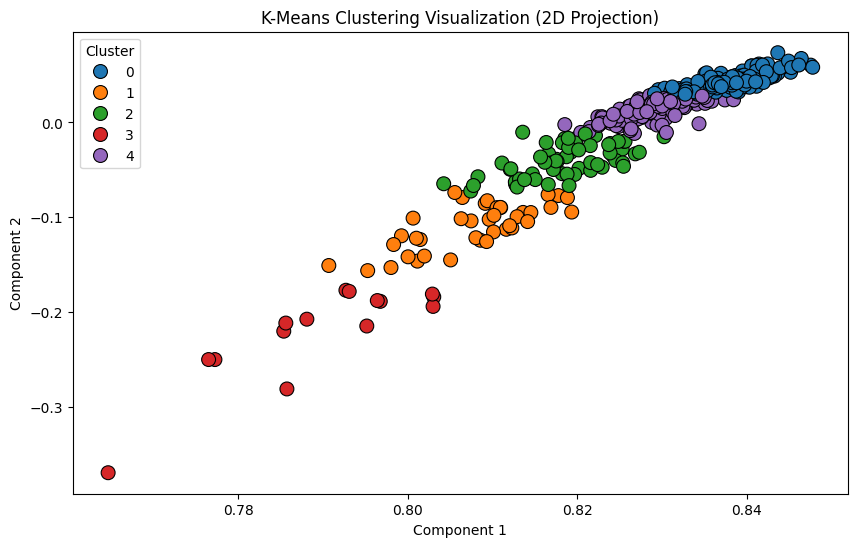

2025-03-09 15:54:23,019 : INFO : collecting all words and their counts
2025-03-09 15:54:23,020 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:23,021 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:23,024 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:23,026 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:23,027 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:23.027303', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:23,029 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:23 

Finished executing at: 2025-03-09 15:54:23 

Executed at: 2025-03-09 15:54:23 



2025-03-09 15:54:23,236 : INFO : EPOCH 10: training on 24723 raw words (4634 effective words) took 0.0s, 286573 effective words/s
2025-03-09 15:54:23,251 : INFO : EPOCH 11: training on 24723 raw words (4670 effective words) took 0.0s, 513215 effective words/s
2025-03-09 15:54:23,270 : INFO : EPOCH 12: training on 24723 raw words (4642 effective words) took 0.0s, 326020 effective words/s
2025-03-09 15:54:23,285 : INFO : EPOCH 13: training on 24723 raw words (4702 effective words) took 0.0s, 471582 effective words/s
2025-03-09 15:54:23,301 : INFO : EPOCH 14: training on 24723 raw words (4720 effective words) took 0.0s, 550001 effective words/s
2025-03-09 15:54:23,314 : INFO : EPOCH 15: training on 24723 raw words (4732 effective words) took 0.0s, 529230 effective words/s
2025-03-09 15:54:23,328 : INFO : EPOCH 16: training on 24723 raw words (4708 effective words) took 0.0s, 543580 effective words/s
2025-03-09 15:54:23,343 : INFO : EPOCH 17: training on 24723 raw words (4726 effective wor

sg=1, Vector_Size=150, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:23 

Executing 5 start time: 2025-03-09 15:54:23
K=5: Silhouette Score and WSS=0.1149	2.0935

Cluster 0:
- Pakistan defeat South Africa in record chase
- Everyone can’t go to jail to meet Imran: IHC CJ
- Balochistan CM announces Pink scooties, electric bikes scheme
- Two soldiers hurt in Indian firing at LoC
- Hamas urges Arab summit, OIC meeting to reject Trump’s plan for Palestinian displacement

Cluster 1:
- IGP pays tributes to police martyrs of Faisal Chowk Mall Road tragedy
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Emirati ambassador to Washington says ‘no alternative’ to Trump's Gaza plan
- Chamber president, Customs men kidnapped in South Waziristan
- Sabrina Carpenter's 'Bad Reviews' lyrics spark rumors about Barry Keoghan after clues in album

Cluster 2:
- Rs10bn defamation suit: LHC seeks more arguments on IK’s plea
- May 9 crossed all limits, say

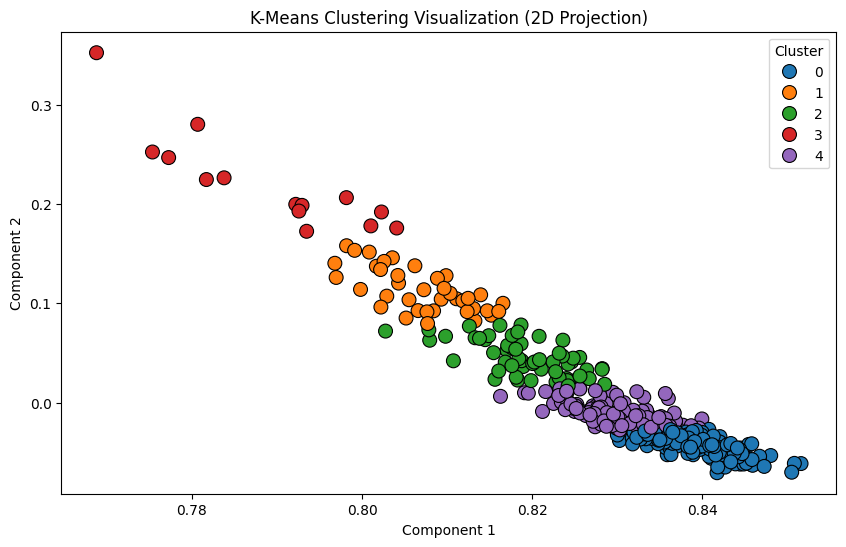

2025-03-09 15:54:24,060 : INFO : collecting all words and their counts
2025-03-09 15:54:24,061 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:24,061 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:24,066 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:24,067 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:24,067 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:24.067300', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:24,067 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:24 

Finished executing at: 2025-03-09 15:54:24 

Executed at: 2025-03-09 15:54:24 



2025-03-09 15:54:24,255 : INFO : EPOCH 10: training on 24723 raw words (4660 effective words) took 0.0s, 532304 effective words/s
2025-03-09 15:54:24,280 : INFO : EPOCH 11: training on 24723 raw words (4685 effective words) took 0.0s, 229326 effective words/s
2025-03-09 15:54:24,309 : INFO : EPOCH 12: training on 24723 raw words (4686 effective words) took 0.0s, 272696 effective words/s
2025-03-09 15:54:24,337 : INFO : EPOCH 13: training on 24723 raw words (4657 effective words) took 0.0s, 280090 effective words/s
2025-03-09 15:54:24,361 : INFO : EPOCH 14: training on 24723 raw words (4595 effective words) took 0.0s, 395456 effective words/s
2025-03-09 15:54:24,383 : INFO : EPOCH 15: training on 24723 raw words (4709 effective words) took 0.0s, 306769 effective words/s
2025-03-09 15:54:24,408 : INFO : EPOCH 16: training on 24723 raw words (4790 effective words) took 0.0s, 324234 effective words/s
2025-03-09 15:54:24,426 : INFO : EPOCH 17: training on 24723 raw words (4555 effective wor

sg=1, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:24 

Executing 5 start time: 2025-03-09 15:54:24
K=5: Silhouette Score and WSS=0.1345	1.9392

Cluster 0:
- South Korea’s Yoon back in court for impeachment hearing
- Ahmed Ali Akbar and Maham Batool Kickstart Their Wedding with a Qawwali Night
- HBL and S&P launch Pakistan’s first Purchasing Managers’ Index
- Russian drone attack damages Chernobyl shelter, Zelensky says
- KP govt prepares to launch first air ambulance service

Cluster 1:
- Man slays 4 kids before turning gun on himself
- Everyone can’t go to jail to meet Imran: IHC CJ
- May 9 crossed all limits, says CB judge
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?

Cluster 2:
- Bollywood music labels seek to challenge OpenAI in India copyright lawsuit
- Awareness session on harassment at workplace held
- Google partners with Poland to expand AI 

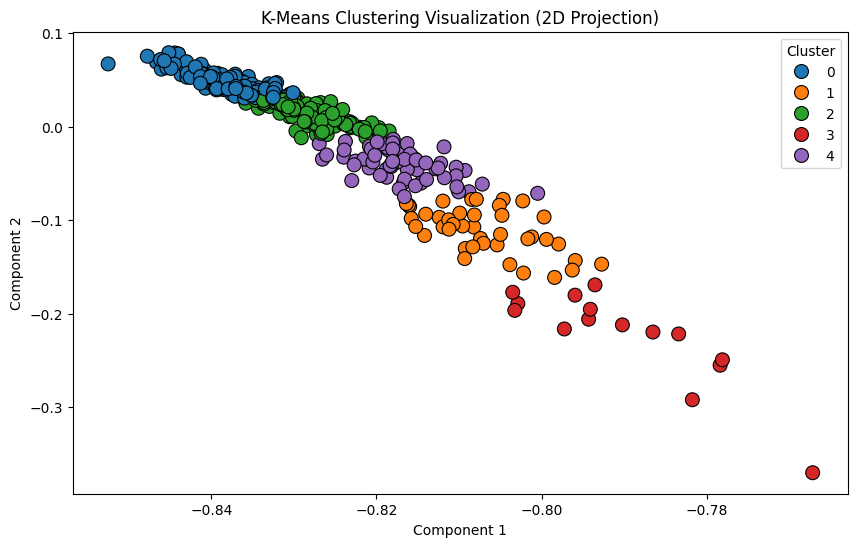

2025-03-09 15:54:25,124 : INFO : collecting all words and their counts
2025-03-09 15:54:25,125 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:25,126 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:25,128 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:25,130 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:25,131 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:25.131736', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:25,133 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:25 

Finished executing at: 2025-03-09 15:54:25 

Executed at: 2025-03-09 15:54:25 



2025-03-09 15:54:25,346 : INFO : EPOCH 10: training on 24723 raw words (4640 effective words) took 0.0s, 374450 effective words/s
2025-03-09 15:54:25,369 : INFO : EPOCH 11: training on 24723 raw words (4615 effective words) took 0.0s, 353218 effective words/s
2025-03-09 15:54:25,389 : INFO : EPOCH 12: training on 24723 raw words (4653 effective words) took 0.0s, 329729 effective words/s
2025-03-09 15:54:25,406 : INFO : EPOCH 13: training on 24723 raw words (4699 effective words) took 0.0s, 413241 effective words/s
2025-03-09 15:54:25,425 : INFO : EPOCH 14: training on 24723 raw words (4656 effective words) took 0.0s, 388207 effective words/s
2025-03-09 15:54:25,443 : INFO : EPOCH 15: training on 24723 raw words (4776 effective words) took 0.0s, 372598 effective words/s
2025-03-09 15:54:25,458 : INFO : EPOCH 16: training on 24723 raw words (4678 effective words) took 0.0s, 408024 effective words/s
2025-03-09 15:54:25,473 : INFO : EPOCH 17: training on 24723 raw words (4753 effective wor

sg=1, Vector_Size=250, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:26 

Executing 5 start time: 2025-03-09 15:54:26
K=5: Silhouette Score and WSS=0.1096	2.0296

Cluster 0:
- Kinnaird College, PMAA equip young women with self-defense skills
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- K-P prepares to launch first air ambulance, test flight completed
- Pakistan defeat South Africa in record chase
- Justice Jahangiri declares writing advocate on vehicles' number plates illegal

Cluster 1:
- Yango Pakistan joined hands with Elixs Bikes to introduce affordable EV bikes for partner’s drivers
- Senate body vows to continue probing solar panel import scandal
- Lawyer admits PTI’s decision to support military courts was wrong
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Commissioner chairs meeting to review monthly performance of Polio team

Cluster 2:
- FPSC issues latest public notice regarding CSS Exam

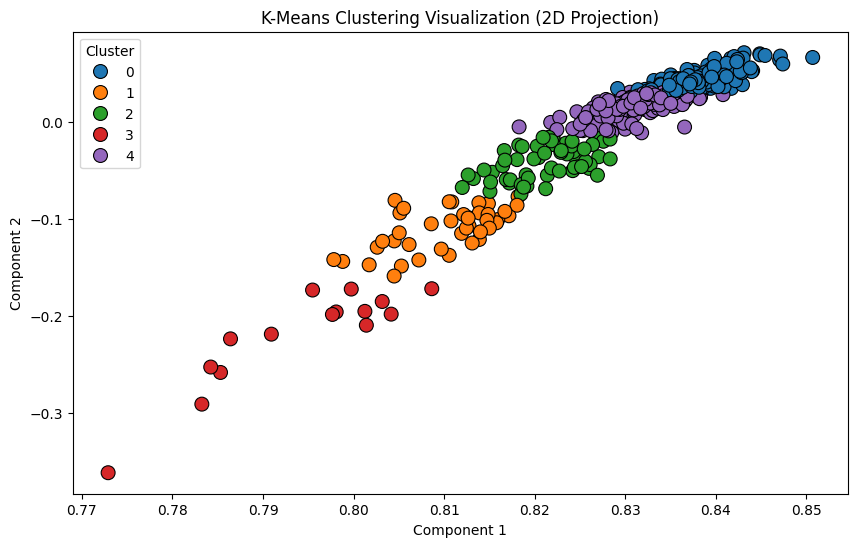

2025-03-09 15:54:26,287 : INFO : collecting all words and their counts
2025-03-09 15:54:26,288 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:26,289 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:26,296 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:26,301 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:26,304 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:26.303252', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:26,305 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:26 

Finished executing at: 2025-03-09 15:54:26 

Executed at: 2025-03-09 15:54:26 



2025-03-09 15:54:26,487 : INFO : EPOCH 6: training on 24723 raw words (4608 effective words) took 0.0s, 462117 effective words/s
2025-03-09 15:54:26,503 : INFO : EPOCH 7: training on 24723 raw words (4593 effective words) took 0.0s, 449999 effective words/s
2025-03-09 15:54:26,519 : INFO : EPOCH 8: training on 24723 raw words (4667 effective words) took 0.0s, 423057 effective words/s
2025-03-09 15:54:26,534 : INFO : EPOCH 9: training on 24723 raw words (4637 effective words) took 0.0s, 424669 effective words/s
2025-03-09 15:54:26,548 : INFO : EPOCH 10: training on 24723 raw words (4590 effective words) took 0.0s, 490857 effective words/s
2025-03-09 15:54:26,561 : INFO : EPOCH 11: training on 24723 raw words (4670 effective words) took 0.0s, 498186 effective words/s
2025-03-09 15:54:26,576 : INFO : EPOCH 12: training on 24723 raw words (4668 effective words) took 0.0s, 433197 effective words/s
2025-03-09 15:54:26,591 : INFO : EPOCH 13: training on 24723 raw words (4703 effective words) 

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:27 

Executing 5 start time: 2025-03-09 15:54:27
K=5: Silhouette Score and WSS=0.1090	2.0913

Cluster 0:
- Punjab sets up 'Honhaar Scholarship' help desk for students
- Ishaq Dar to visit USA for UNSC meeting
- Caught in crossfire? Women under siege in influencer culture
- #IStandWithSandiePeggie: Nurse Sandie Peggie speaks out amid NHS Fife women’s changing room scandal
- Hubco Green, PSO collaborate to setup EV charging infrastructure across Pakistan

Cluster 1:
- Man slays 4 kids before turning gun on himself
- UEFA Champions League playoffs: Bayern, Benfica in ideal position
- Lizzo teases ‘End of an era’ with cryptic Instagram post months after sexual abuse scandal
- TikTok’s Back in the Game! The Viral App Finally Returns to U.S. App Stores!
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says

Cluster 2:
- Sindh mandates physical fitness certificate for all heavy 

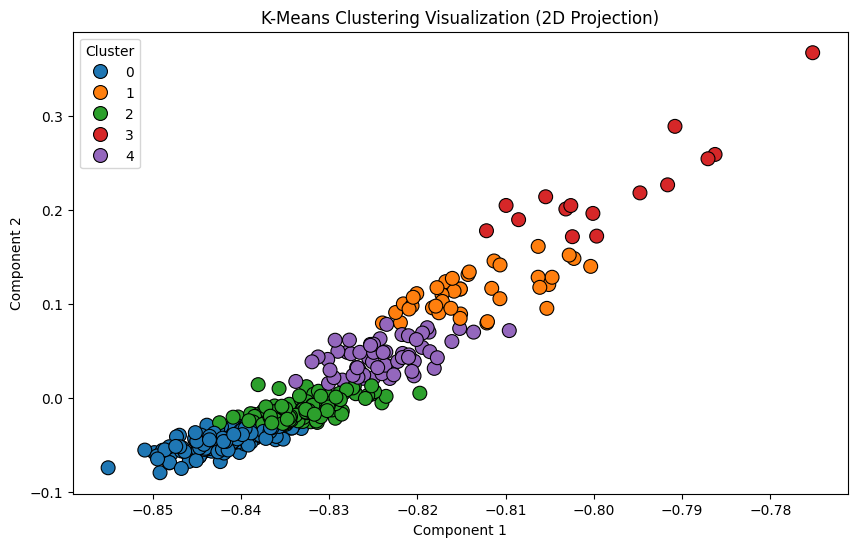

Finished displaying at: 2025-03-09 15:54:27 

Finished executing at: 2025-03-09 15:54:27 



In [555]:
best_combination, best_Sil, best_WSS = run_combinations(5, best_combination, best_Sil, best_WSS)

2025-03-09 15:54:27,452 : INFO : collecting all words and their counts
2025-03-09 15:54:27,453 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:27,453 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:27,456 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:27,457 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:27,458 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:27.458899', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:27,460 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:54:27 



2025-03-09 15:54:27,634 : INFO : EPOCH 11: training on 24723 raw words (4717 effective words) took 0.0s, 686009 effective words/s
2025-03-09 15:54:27,645 : INFO : EPOCH 12: training on 24723 raw words (4684 effective words) took 0.0s, 659022 effective words/s
2025-03-09 15:54:27,655 : INFO : EPOCH 13: training on 24723 raw words (4741 effective words) took 0.0s, 673897 effective words/s
2025-03-09 15:54:27,666 : INFO : EPOCH 14: training on 24723 raw words (4621 effective words) took 0.0s, 601920 effective words/s
2025-03-09 15:54:27,677 : INFO : EPOCH 15: training on 24723 raw words (4689 effective words) took 0.0s, 654212 effective words/s
2025-03-09 15:54:27,690 : INFO : EPOCH 16: training on 24723 raw words (4626 effective words) took 0.0s, 630666 effective words/s
2025-03-09 15:54:27,701 : INFO : EPOCH 17: training on 24723 raw words (4724 effective words) took 0.0s, 592924 effective words/s
2025-03-09 15:54:27,712 : INFO : EPOCH 18: training on 24723 raw words (4690 effective wor

sg=1, Vector_Size=50, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:28 

Executing 9 start time: 2025-03-09 15:54:28
K=9: Silhouette Score and WSS=0.0849	1.9589

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- Jeffrey Sachs: Trump's tariff policy bound to fail
- JUI-F chief stands with journalists against PECA law
- PM Modi Meets Elon Musk in Washington, Discusses Tech Ties Amid Trump Tariff Threats
- Everyone can’t go to jail to meet Imran: IHC CJ

Cluster 1:
- State Bank of Pakistan’s liquid foreign reserves fall by $252 million
- Islamabad’s Zones 2, 4, and 5: CDA forms joint body to oversee projects
- Druski roasted by NBA fans for bold 2025 All-Star game stat predictions and lack of defense
- Govt hikes RLNG prices by up to 1.86pc
- India expects $200 million missile deal with Philippines this year, sources say

Cluster 2:
- Ishaq Dar to visit USA for UNSC meeting
- KP govt prepares to launch first air ambulance service
- US 

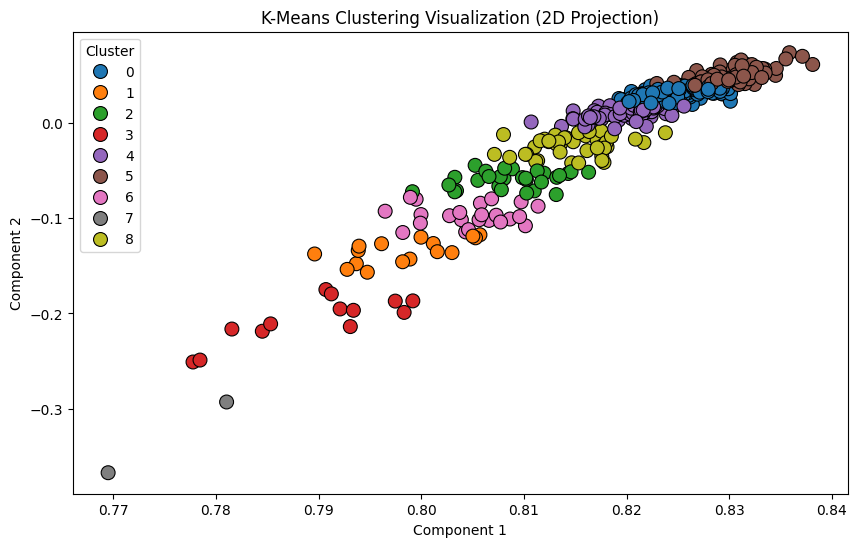

2025-03-09 15:54:28,342 : INFO : collecting all words and their counts
2025-03-09 15:54:28,343 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:28,343 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:28,347 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:28,348 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:28,349 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:28.349130', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:28,350 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:28 

Finished executing at: 2025-03-09 15:54:28 

Executed at: 2025-03-09 15:54:28 



2025-03-09 15:54:28,524 : INFO : EPOCH 15: training on 24723 raw words (4660 effective words) took 0.0s, 739401 effective words/s
2025-03-09 15:54:28,535 : INFO : EPOCH 16: training on 24723 raw words (4710 effective words) took 0.0s, 693759 effective words/s
2025-03-09 15:54:28,547 : INFO : EPOCH 17: training on 24723 raw words (4724 effective words) took 0.0s, 695975 effective words/s
2025-03-09 15:54:28,559 : INFO : EPOCH 18: training on 24723 raw words (4625 effective words) took 0.0s, 601008 effective words/s
2025-03-09 15:54:28,570 : INFO : EPOCH 19: training on 24723 raw words (4626 effective words) took 0.0s, 647627 effective words/s
2025-03-09 15:54:28,581 : INFO : EPOCH 20: training on 24723 raw words (4737 effective words) took 0.0s, 655749 effective words/s
2025-03-09 15:54:28,593 : INFO : EPOCH 21: training on 24723 raw words (4610 effective words) took 0.0s, 600832 effective words/s
2025-03-09 15:54:28,604 : INFO : EPOCH 22: training on 24723 raw words (4745 effective wor

sg=1, Vector_Size=100, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:28 

Executing 9 start time: 2025-03-09 15:54:28
K=9: Silhouette Score and WSS=0.0847	1.9269

Cluster 0:
- Credits against tax WH: FBR issuing notices to salaried individuals: KTBA
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa
- JUI-F chief stands with journalists against PECA law
- US Navy aircraft carrier collides with merchant ship near Egypt, Suez Canal
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- PM urges Turkish businessmen to invest in diverse fields
- Govt reshuffles key bureaucratic positions, appoints new MD for Utility Stores
- Int­er­national Finance Corpo­ration chief urges Pakistan to ensure macro-economic stability
- Kanye West and Bianca Censori deny divorce rumours amid controversies
- Two more IMF missions to visit Pakistan for climate resilience funding, EFF review

C

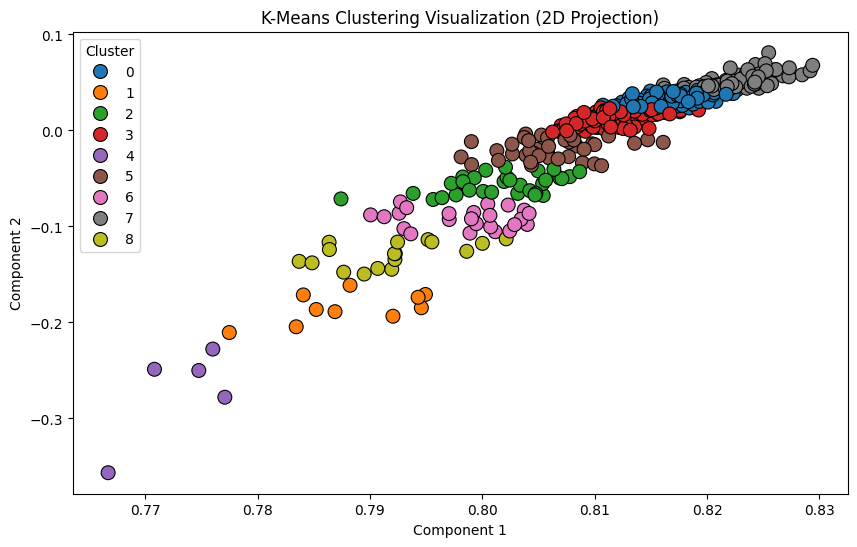

2025-03-09 15:54:29,197 : INFO : collecting all words and their counts
2025-03-09 15:54:29,198 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:29,199 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:29,202 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:29,203 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:29,204 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:29.204110', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:29,205 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:29 

Finished executing at: 2025-03-09 15:54:29 

Executed at: 2025-03-09 15:54:29 



2025-03-09 15:54:29,383 : INFO : EPOCH 12: training on 24723 raw words (4656 effective words) took 0.0s, 582546 effective words/s
2025-03-09 15:54:29,397 : INFO : EPOCH 13: training on 24723 raw words (4706 effective words) took 0.0s, 551299 effective words/s
2025-03-09 15:54:29,409 : INFO : EPOCH 14: training on 24723 raw words (4616 effective words) took 0.0s, 626000 effective words/s
2025-03-09 15:54:29,423 : INFO : EPOCH 15: training on 24723 raw words (4708 effective words) took 0.0s, 440552 effective words/s
2025-03-09 15:54:29,437 : INFO : EPOCH 16: training on 24723 raw words (4680 effective words) took 0.0s, 693971 effective words/s
2025-03-09 15:54:29,450 : INFO : EPOCH 17: training on 24723 raw words (4679 effective words) took 0.0s, 500037 effective words/s
2025-03-09 15:54:29,462 : INFO : EPOCH 18: training on 24723 raw words (4662 effective words) took 0.0s, 524215 effective words/s
2025-03-09 15:54:29,476 : INFO : EPOCH 19: training on 24723 raw words (4641 effective wor

sg=1, Vector_Size=150, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:30 

Executing 9 start time: 2025-03-09 15:54:30
K=9: Silhouette Score and WSS=0.0994	1.7949

Cluster 0:
- Paramount channels, including CBS and Nickelodeon, to go dark on YouTube TV
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice
- South Korea’s Yoon back in court for impeachment hearing
- Law ministry notifies appointments of six SC judges, four high court chief justices
- South African rand firms after Trump’s tariff move; local budget next week

Cluster 1:
- PARTLY FACETIOUS: Our stakeholders know everything about everything
- Hasan Raheem softens down his song 'Obvious'
- PM Shehbaz invites Turkish businessmen to invest in Pakistan’s diverse fields
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- Jisoo returns with earthquake music video from new mini-album AMORTAGE on Valentine’s Day

Cluster 2:
- Gold price soars by Rs2,50

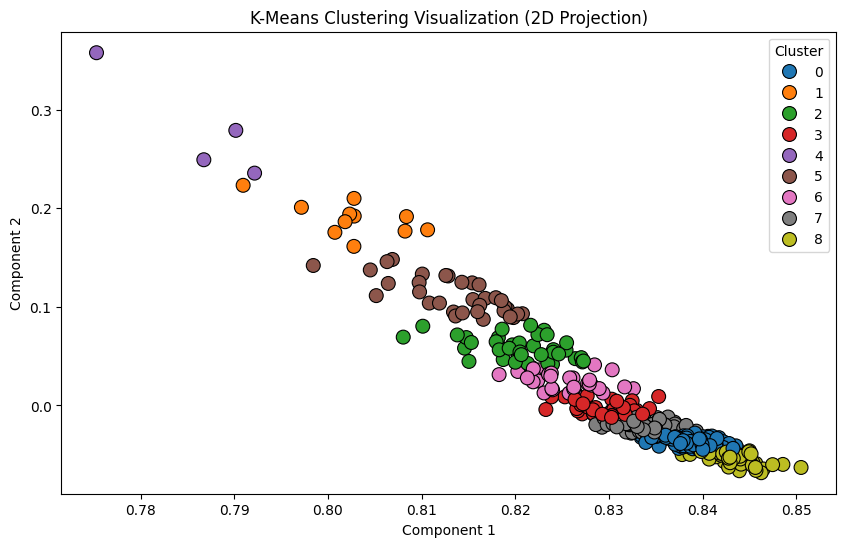

2025-03-09 15:54:30,738 : INFO : collecting all words and their counts
2025-03-09 15:54:30,739 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:30,739 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:30,743 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:30,744 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:30,744 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:30.744187', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:30,745 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:30 

Finished executing at: 2025-03-09 15:54:30 

Executed at: 2025-03-09 15:54:30 



2025-03-09 15:54:30,945 : INFO : EPOCH 13: training on 24723 raw words (4648 effective words) took 0.0s, 540673 effective words/s
2025-03-09 15:54:30,958 : INFO : EPOCH 14: training on 24723 raw words (4731 effective words) took 0.0s, 509718 effective words/s
2025-03-09 15:54:30,972 : INFO : EPOCH 15: training on 24723 raw words (4676 effective words) took 0.0s, 445444 effective words/s
2025-03-09 15:54:30,987 : INFO : EPOCH 16: training on 24723 raw words (4748 effective words) took 0.0s, 467931 effective words/s
2025-03-09 15:54:31,003 : INFO : EPOCH 17: training on 24723 raw words (4736 effective words) took 0.0s, 442849 effective words/s
2025-03-09 15:54:31,017 : INFO : EPOCH 18: training on 24723 raw words (4696 effective words) took 0.0s, 522341 effective words/s
2025-03-09 15:54:31,031 : INFO : EPOCH 19: training on 24723 raw words (4698 effective words) took 0.0s, 471081 effective words/s
2025-03-09 15:54:31,043 : INFO : EPOCH 20: training on 24723 raw words (4618 effective wor

sg=1, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:31 

Executing 9 start time: 2025-03-09 15:54:31
K=9: Silhouette Score and WSS=0.0948	1.6920

Cluster 0:
- Gazans return to ruined homes and severe water shortage
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC
- House Democrats urge Trump to retract comments on Gaza
- Punjab home secretary visits Business Facilitation Centre
- Aurangzeb highlights increasing risks facing insurance industry

Cluster 1:
- Adani to restore full power to Bangladesh in days but differences remain, say sources
- TikTok’s Back in the Game! The Viral App Finally Returns to U.S. App Stores!
- Pakistan withdraws key powers from FBR on IMF demand
- Drake and PARTYNEXTDOOR drop $ome $exy $ongs 4 U on Valentine’s Day
- Resident Alien season 4: new network, plot twists, and release timeline

Cluster 2:
- BISE Rawalpindi 10th Class Roll Number Slips 2025 for private students update
- Islamabad’s Zones 2, 4, and 5: CDA 

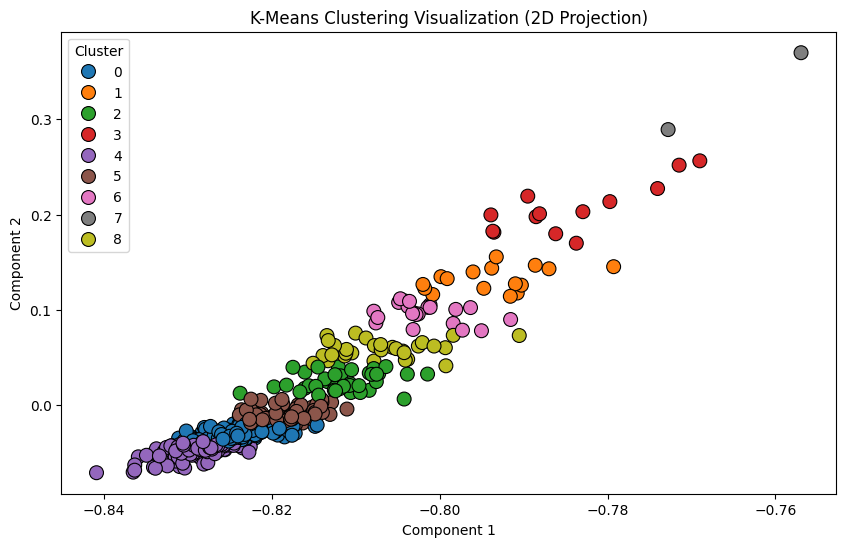

2025-03-09 15:54:31,743 : INFO : collecting all words and their counts
2025-03-09 15:54:31,744 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:31,744 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:31,747 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:31,749 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:31,750 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:31.750034', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:31,752 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:31 

Finished executing at: 2025-03-09 15:54:31 

Executed at: 2025-03-09 15:54:31 



2025-03-09 15:54:31,940 : INFO : EPOCH 4: training on 24723 raw words (4678 effective words) took 0.0s, 263368 effective words/s
2025-03-09 15:54:31,978 : INFO : EPOCH 5: training on 24723 raw words (4767 effective words) took 0.0s, 283049 effective words/s
2025-03-09 15:54:32,002 : INFO : EPOCH 6: training on 24723 raw words (4722 effective words) took 0.0s, 313008 effective words/s
2025-03-09 15:54:32,026 : INFO : EPOCH 7: training on 24723 raw words (4586 effective words) took 0.0s, 297310 effective words/s
2025-03-09 15:54:32,052 : INFO : EPOCH 8: training on 24723 raw words (4680 effective words) took 0.0s, 302152 effective words/s
2025-03-09 15:54:32,077 : INFO : EPOCH 9: training on 24723 raw words (4770 effective words) took 0.0s, 279783 effective words/s
2025-03-09 15:54:32,096 : INFO : EPOCH 10: training on 24723 raw words (4658 effective words) took 0.0s, 399153 effective words/s
2025-03-09 15:54:32,116 : INFO : EPOCH 11: training on 24723 raw words (4685 effective words) to

sg=1, Vector_Size=250, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:32 

Executing 9 start time: 2025-03-09 15:54:32
K=9: Silhouette Score and WSS=0.0911	1.7725

Cluster 0:
- China’s Tencent wins video copyright infringment case in US district court
- South African rand firms after Trump’s tariff move; local budget next week
- CM Murad invites Japanese companies to invest in Karachi mass transit projects
- Senate Dy Chairman, Balochistan CM discuss development projects
- Justice Sarfraz Dogar sworn in as acting chief justice of IHC

Cluster 1:
- Breathe Pakistan: A cleaner tomorrow, one step at a time
- PA pre-budget debate overshadowed by lawmakers’ apathy
- Afghan asylum seeker arrested after car ramming attack wounds 28 in Germany
- Ahmer honored for contributions to squash at K2 Squash Gold Event
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year

Cluster 2:
- Rajat Patidar named RCB captain for IPL 2025 as Virat Kohli gets s

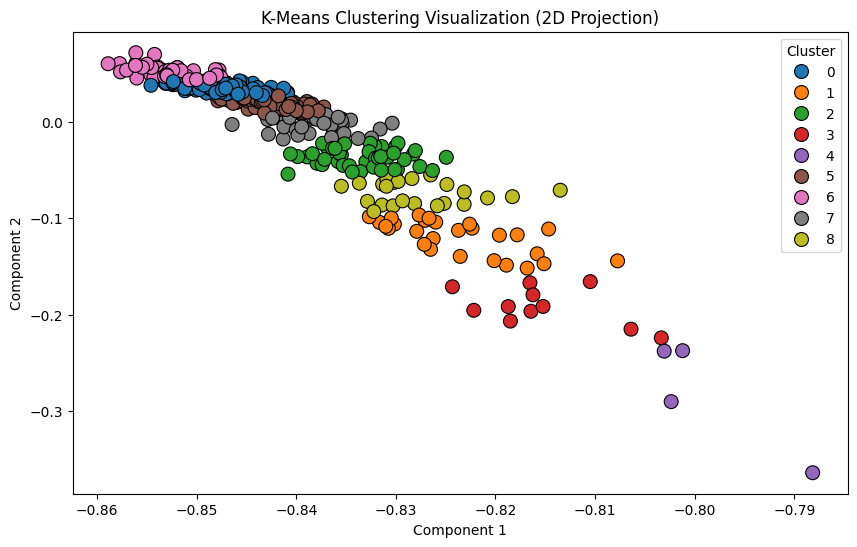

2025-03-09 15:54:33,251 : INFO : collecting all words and their counts
2025-03-09 15:54:33,252 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:33,252 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:33,255 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:33,257 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:33,258 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:33.258709', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:33,259 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:33 

Finished executing at: 2025-03-09 15:54:33 

Executed at: 2025-03-09 15:54:33 



2025-03-09 15:54:33,470 : INFO : EPOCH 7: training on 24723 raw words (4656 effective words) took 0.0s, 268954 effective words/s
2025-03-09 15:54:33,506 : INFO : EPOCH 8: training on 24723 raw words (4590 effective words) took 0.0s, 159892 effective words/s
2025-03-09 15:54:33,541 : INFO : EPOCH 9: training on 24723 raw words (4607 effective words) took 0.0s, 219258 effective words/s
2025-03-09 15:54:33,574 : INFO : EPOCH 10: training on 24723 raw words (4546 effective words) took 0.0s, 235247 effective words/s
2025-03-09 15:54:33,598 : INFO : EPOCH 11: training on 24723 raw words (4743 effective words) took 0.0s, 318898 effective words/s
2025-03-09 15:54:33,623 : INFO : EPOCH 12: training on 24723 raw words (4788 effective words) took 0.0s, 316092 effective words/s
2025-03-09 15:54:33,657 : INFO : EPOCH 13: training on 24723 raw words (4682 effective words) took 0.0s, 265961 effective words/s
2025-03-09 15:54:33,684 : INFO : EPOCH 14: training on 24723 raw words (4744 effective words)

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:34 

Executing 9 start time: 2025-03-09 15:54:34
K=9: Silhouette Score and WSS=0.0924	1.6361

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- Govt reshuffles key bureaucratic positions, appoints new MD for Utility Stores
- Law ministry notifies appointments of six SC judges, four high court chief justices
- Balochistan CM announces Pink scooties, electric bikes scheme
- Injuries disrupted England’s training during India ODI series: McCullum

Cluster 1:
- Over 500 million devotees take 'holy dip' at Maha Kumbh Mela in India
- JazzCash, Mobilink Bank named finalists for prestigious GLOMO Awards 2025
- Pakistan, Turkey set sights on $5b trade
- 394th annual Urs of Hazrat Ishan starts
- Rajat Patidar named RCB captain for IPL 2025 as Virat Kohli gets snubbed

Cluster 2:
- Saudi Arabia to host Arab summit on Trump’s Gaza plan
- Former SC judge Sheikh Azmat Saeed’s fun

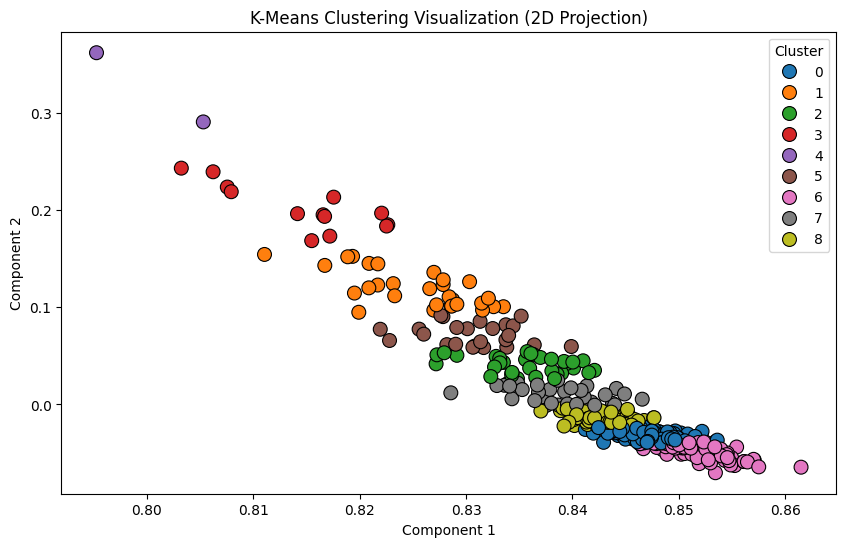

Finished displaying at: 2025-03-09 15:54:34 

Finished executing at: 2025-03-09 15:54:34 



In [556]:
best_combination, best_Sil, best_WSS = run_combinations(9, best_combination, best_Sil, best_WSS)

2025-03-09 15:54:34,702 : INFO : collecting all words and their counts
2025-03-09 15:54:34,706 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:34,707 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:34,712 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:34,714 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:34,715 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:34.715440', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:34,716 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Executed at: 2025-03-09 15:54:34 



2025-03-09 15:54:34,873 : INFO : EPOCH 10: training on 24723 raw words (4737 effective words) took 0.0s, 619702 effective words/s
2025-03-09 15:54:34,886 : INFO : EPOCH 11: training on 24723 raw words (4628 effective words) took 0.0s, 1667327 effective words/s
2025-03-09 15:54:34,897 : INFO : EPOCH 12: training on 24723 raw words (4676 effective words) took 0.0s, 694717 effective words/s
2025-03-09 15:54:34,910 : INFO : EPOCH 13: training on 24723 raw words (4622 effective words) took 0.0s, 584775 effective words/s
2025-03-09 15:54:34,922 : INFO : EPOCH 14: training on 24723 raw words (4691 effective words) took 0.0s, 710758 effective words/s
2025-03-09 15:54:34,933 : INFO : EPOCH 15: training on 24723 raw words (4648 effective words) took 0.0s, 636852 effective words/s
2025-03-09 15:54:34,944 : INFO : EPOCH 16: training on 24723 raw words (4634 effective words) took 0.0s, 721649 effective words/s
2025-03-09 15:54:34,956 : INFO : EPOCH 17: training on 24723 raw words (4703 effective wo

sg=1, Vector_Size=50, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:35 

Executing 13 start time: 2025-03-09 15:54:35
K=13: Silhouette Score and WSS=0.0911	1.7055

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- Jeffrey Sachs: Trump's tariff policy bound to fail
- Holding peaceful meetings democratic right of all parties, says Irfan Siddiqui
- Injuries disrupted England’s training during India ODI series: McCullum
- 28 injured in car ramming attack in Munich

Cluster 1:
- Page Analyses and Comments LHR Page 2
- Pakistan Refinery says will shut down plant for ‘approximately 6 days’
- Kanye West returns to X after Antisemitic rant, fans say 'the black vans paid a visit'
- Man slays 4 kids before turning gun on himself
- Europe, Kyiv warn Trump against ‘dirty deal’ on Ukraine

Cluster 2:
- Gold price soars by Rs2,500 per tola
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- Feb 14 last date to submit third in

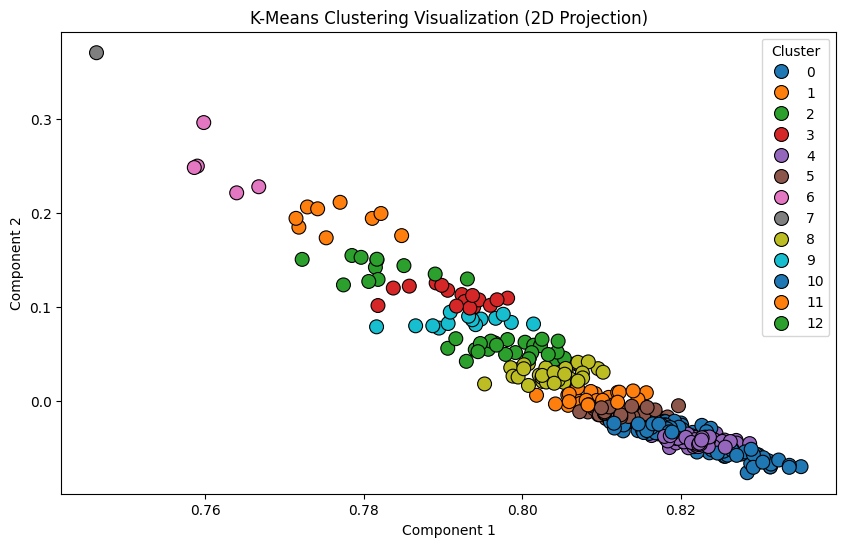

2025-03-09 15:54:35,600 : INFO : collecting all words and their counts
2025-03-09 15:54:35,600 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:35,601 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:35,603 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:35,604 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:35,605 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:35.605262', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:35,606 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:35 

Finished executing at: 2025-03-09 15:54:35 

Executed at: 2025-03-09 15:54:35 



2025-03-09 15:54:35,787 : INFO : EPOCH 7: training on 24723 raw words (4672 effective words) took 0.0s, 672066 effective words/s
2025-03-09 15:54:35,800 : INFO : EPOCH 8: training on 24723 raw words (4673 effective words) took 0.0s, 622063 effective words/s
2025-03-09 15:54:35,814 : INFO : EPOCH 9: training on 24723 raw words (4748 effective words) took 0.0s, 536734 effective words/s
2025-03-09 15:54:35,826 : INFO : EPOCH 10: training on 24723 raw words (4710 effective words) took 0.0s, 605624 effective words/s
2025-03-09 15:54:35,841 : INFO : EPOCH 11: training on 24723 raw words (4750 effective words) took 0.0s, 514398 effective words/s
2025-03-09 15:54:35,857 : INFO : EPOCH 12: training on 24723 raw words (4626 effective words) took 0.0s, 521292 effective words/s
2025-03-09 15:54:35,868 : INFO : EPOCH 13: training on 24723 raw words (4708 effective words) took 0.0s, 652204 effective words/s
2025-03-09 15:54:35,881 : INFO : EPOCH 14: training on 24723 raw words (4691 effective words)

sg=1, Vector_Size=100, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:36 

Executing 13 start time: 2025-03-09 15:54:36
K=13: Silhouette Score and WSS=0.0735	1.7034

Cluster 0:
- South African rand firms after Trump’s tariff move; local budget next week
- KU VC Prof Dr Khalid Iraqi inaugurates second agricultural festival
- The rise of a larger but weaker judiciary?
- Aurangzeb highlights increasing risks facing insurance industry
- JUI-F chief stands with journalists against PECA law

Cluster 1:
- Israel says Hamas must free three living hostages
- ‘We risk losing hold on reality’: Scarlett Johansson slams AI video of stars protesting against Kanye
- Playgrounds come alive again with Brazil school phone ban
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Adani to restore full power to Bangladesh in days but differences remain, say sources

Cluster 2:
- South Green book berth in Rangers Cup Basketball final
- Sabalenka, Gauff dumped out of Qatar Open
- Watch: H

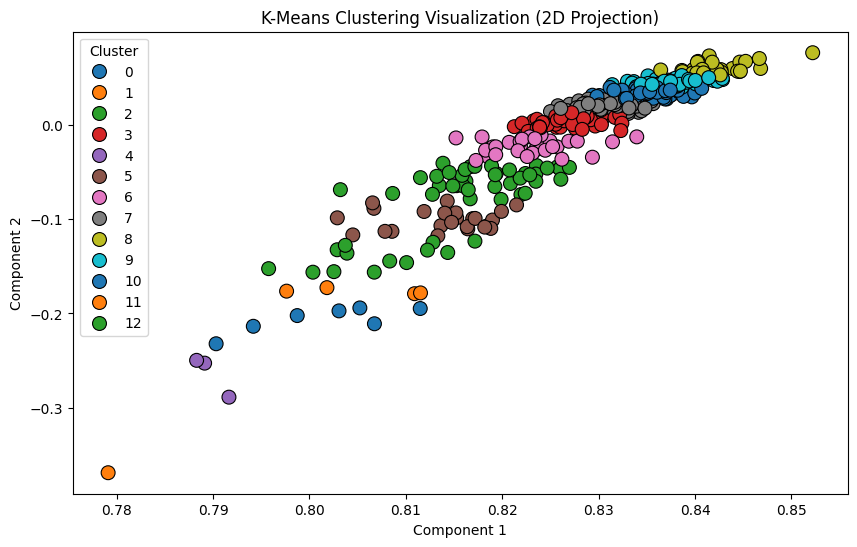

2025-03-09 15:54:36,596 : INFO : collecting all words and their counts
2025-03-09 15:54:36,597 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:36,598 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:36,601 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:36,602 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:36,604 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:36.604186', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:36,605 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:36 

Finished executing at: 2025-03-09 15:54:36 

Executed at: 2025-03-09 15:54:36 



2025-03-09 15:54:36,793 : INFO : EPOCH 13: training on 24723 raw words (4656 effective words) took 0.0s, 516318 effective words/s
2025-03-09 15:54:36,816 : INFO : EPOCH 14: training on 24723 raw words (4689 effective words) took 0.0s, 434436 effective words/s
2025-03-09 15:54:36,842 : INFO : EPOCH 15: training on 24723 raw words (4664 effective words) took 0.0s, 269499 effective words/s
2025-03-09 15:54:36,865 : INFO : EPOCH 16: training on 24723 raw words (4658 effective words) took 0.0s, 619868 effective words/s
2025-03-09 15:54:36,891 : INFO : EPOCH 17: training on 24723 raw words (4592 effective words) took 0.0s, 251607 effective words/s
2025-03-09 15:54:36,913 : INFO : EPOCH 18: training on 24723 raw words (4648 effective words) took 0.0s, 413969 effective words/s
2025-03-09 15:54:36,933 : INFO : EPOCH 19: training on 24723 raw words (4656 effective words) took 0.0s, 319673 effective words/s
2025-03-09 15:54:36,953 : INFO : EPOCH 20: training on 24723 raw words (4653 effective wor

sg=1, Vector_Size=150, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:37 

Executing 13 start time: 2025-03-09 15:54:37
K=13: Silhouette Score and WSS=0.0942	1.5370

Cluster 0:
- Pak eye bright future with CT hosting
- Did Elon Musk’s son really tell Trump to 'shush your f***ing mouth up' in the Oval Office?
- Everyone can’t go to jail to meet Imran: IHC CJ
- 28 injured in car ramming attack in Munich
- South African rand firms after Trump’s tariff move; local budget next week

Cluster 1:
- JD Vance says US wields economic, military leverage on Russia in Ukraine talks
- Karachi basketball at crossroads as rival factions clash
- Haveli of Maharaja Ranjit Singh being conserved by WCLA
- Agri talks with China likely next month: Tanveer
- Still Angry at Your Ex? The San Antonio Zoo Will Name a Cockroach After Them & Feed it To Animals

Cluster 2:
- Page Analyses and Comments LHR Page 2
- Govt has no plan to impose new taxes: NA told
- DOGE subcommittee uncovers $2.7 trillion i

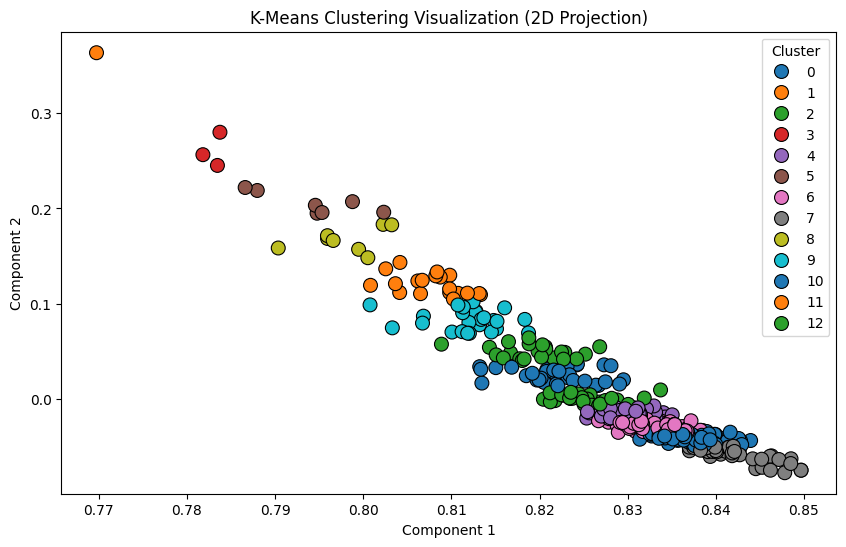

2025-03-09 15:54:38,288 : INFO : collecting all words and their counts
2025-03-09 15:54:38,289 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:38,290 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:38,293 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:38,294 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:38,296 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:38.296918', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:38,297 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:38 

Finished executing at: 2025-03-09 15:54:38 

Executed at: 2025-03-09 15:54:38 



2025-03-09 15:54:38,467 : INFO : EPOCH 4: training on 24723 raw words (4767 effective words) took 0.0s, 263593 effective words/s
2025-03-09 15:54:38,488 : INFO : EPOCH 5: training on 24723 raw words (4551 effective words) took 0.0s, 383294 effective words/s
2025-03-09 15:54:38,509 : INFO : EPOCH 6: training on 24723 raw words (4649 effective words) took 0.0s, 306244 effective words/s
2025-03-09 15:54:38,527 : INFO : EPOCH 7: training on 24723 raw words (4670 effective words) took 0.0s, 463399 effective words/s
2025-03-09 15:54:38,548 : INFO : EPOCH 8: training on 24723 raw words (4667 effective words) took 0.0s, 309598 effective words/s
2025-03-09 15:54:38,569 : INFO : EPOCH 9: training on 24723 raw words (4702 effective words) took 0.0s, 359524 effective words/s
2025-03-09 15:54:38,589 : INFO : EPOCH 10: training on 24723 raw words (4689 effective words) took 0.0s, 325627 effective words/s
2025-03-09 15:54:38,614 : INFO : EPOCH 11: training on 24723 raw words (4641 effective words) to

sg=1, Vector_Size=200, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:39 

Executing 13 start time: 2025-03-09 15:54:39
K=13: Silhouette Score and WSS=0.0807	1.7512

Cluster 0:
- JUI-F chief stands with journalists against PECA law
- Trump launches ‘reciprocal tariffs’ for allies, rivals
- Jeffrey Sachs: Trump's tariff policy bound to fail
- PTI backed military courts after APS attack, says Justice Hilali
- Kuwait hosts high-level forum to discuss International Islamic Court of Justice

Cluster 1:
- Sri Lanka shares end higher; central bank sees inflation peak above target in Q2 next year
- Page World Economy and Politics News Page 5
- Workshop stresses for shaping equitable, sustainable food systems
- Resident Alien season 4: new network, plot twists, and release timeline
- Passing-out parade of 35th FC course held in Warsak

Cluster 2:
- Stocks remain range-bound, KSE-100 closes 361 points lower
- UK Pound further climbs up against Pakistani rupee – 14 February 2025
- Is

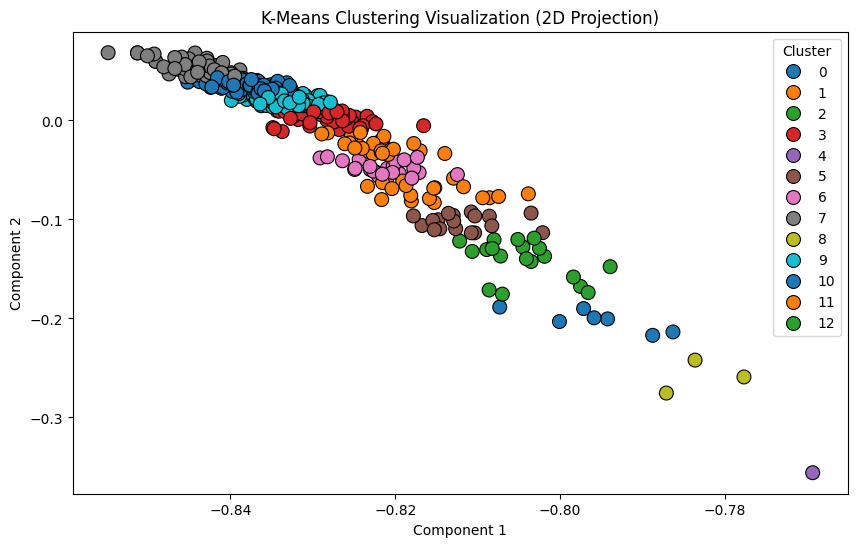

2025-03-09 15:54:39,608 : INFO : collecting all words and their counts
2025-03-09 15:54:39,608 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:39,609 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:39,613 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:39,613 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:39,614 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:39.614756', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:39,616 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:39 

Finished executing at: 2025-03-09 15:54:39 

Executed at: 2025-03-09 15:54:39 



2025-03-09 15:54:39,807 : INFO : EPOCH 8: training on 24723 raw words (4762 effective words) took 0.0s, 489610 effective words/s
2025-03-09 15:54:39,823 : INFO : EPOCH 9: training on 24723 raw words (4718 effective words) took 0.0s, 551594 effective words/s
2025-03-09 15:54:39,836 : INFO : EPOCH 10: training on 24723 raw words (4628 effective words) took 0.0s, 446373 effective words/s
2025-03-09 15:54:39,850 : INFO : EPOCH 11: training on 24723 raw words (4702 effective words) took 0.0s, 628139 effective words/s
2025-03-09 15:54:39,866 : INFO : EPOCH 12: training on 24723 raw words (4696 effective words) took 0.0s, 486839 effective words/s
2025-03-09 15:54:39,879 : INFO : EPOCH 13: training on 24723 raw words (4644 effective words) took 0.0s, 467236 effective words/s
2025-03-09 15:54:39,895 : INFO : EPOCH 14: training on 24723 raw words (4633 effective words) took 0.0s, 483506 effective words/s
2025-03-09 15:54:39,908 : INFO : EPOCH 15: training on 24723 raw words (4639 effective words

sg=1, Vector_Size=250, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:40 

Executing 13 start time: 2025-03-09 15:54:40
K=13: Silhouette Score and WSS=0.0887	1.6493

Cluster 0:
- Ishaq Dar to visit USA for UNSC meeting
- Aurangzeb highlights increasing risks facing insurance industry
- Justice Sarfraz Dogar takes oath as acting Chief Justice of IHC
- UK, US agree Zelenskiy must be part of Ukraine peace talks, UK foreign minister says
- Everyone can’t go to jail to meet Imran: IHC CJ

Cluster 1:
- Senate Dy Chairman, Balochistan CM discuss development projects
- Meta's new tools aim to protect users from Valentine's Day romance fraud
- Ty Dolla $ign cuts ties with Kanye West, deletes Instagram posts over Antisemitic controversy
- Govt has no plan to impose new taxes: NA told
- TikTok reinstated in app stores after national security concerns and legal battle

Cluster 2:
- Gold adds to record rally, reaches Rs306,200 per tola in Pakistan
- IMF’s 2024 Article IV report, and de

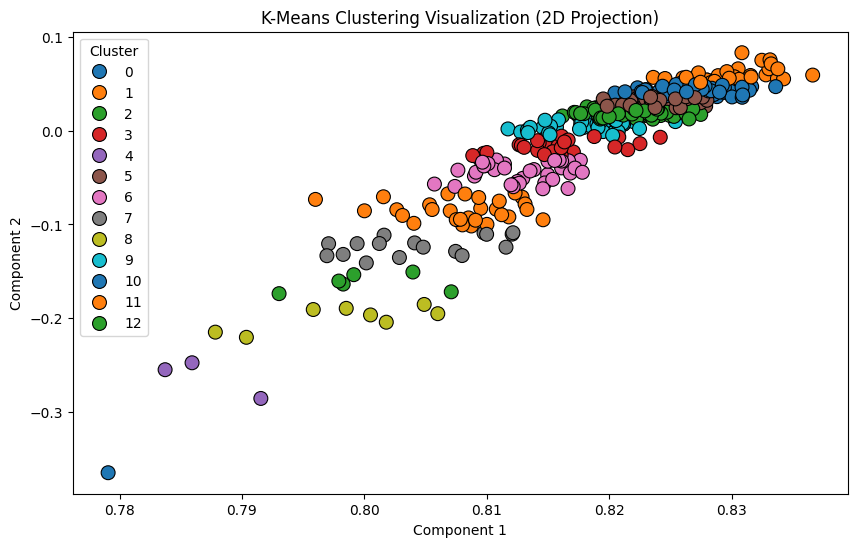

2025-03-09 15:54:40,880 : INFO : collecting all words and their counts
2025-03-09 15:54:40,881 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2025-03-09 15:54:40,882 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-03-09 15:54:40,887 : INFO : collected 38 word types from a corpus of 24723 raw words and 453 sentences
2025-03-09 15:54:40,888 : INFO : Creating a fresh vocabulary
2025-03-09 15:54:40,890 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 38 unique words (100.00% of original 38, drops 0)', 'datetime': '2025-03-09T15:54:40.890412', 'gensim': '4.3.3', 'python': '3.12.9 (tags/v3.12.9:fdb8142, Feb  4 2025, 15:27:58) [MSC v.1942 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.26100-SP0', 'event': 'prepare_vocab'}
2025-03-09 15:54:40,893 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 24723 word corpus (100.00% of origi

Finished displaying at: 2025-03-09 15:54:40 

Finished executing at: 2025-03-09 15:54:40 

Executed at: 2025-03-09 15:54:40 



2025-03-09 15:54:41,061 : INFO : EPOCH 10: training on 24723 raw words (4723 effective words) took 0.0s, 635752 effective words/s
2025-03-09 15:54:41,076 : INFO : EPOCH 11: training on 24723 raw words (4746 effective words) took 0.0s, 466249 effective words/s
2025-03-09 15:54:41,091 : INFO : EPOCH 12: training on 24723 raw words (4694 effective words) took 0.0s, 482019 effective words/s
2025-03-09 15:54:41,105 : INFO : EPOCH 13: training on 24723 raw words (4660 effective words) took 0.0s, 513725 effective words/s
2025-03-09 15:54:41,118 : INFO : EPOCH 14: training on 24723 raw words (4609 effective words) took 0.0s, 471441 effective words/s
2025-03-09 15:54:41,133 : INFO : EPOCH 15: training on 24723 raw words (4723 effective words) took 0.0s, 507631 effective words/s
2025-03-09 15:54:41,146 : INFO : EPOCH 16: training on 24723 raw words (4686 effective words) took 0.0s, 505895 effective words/s
2025-03-09 15:54:41,159 : INFO : EPOCH 17: training on 24723 raw words (4658 effective wor

sg=1, Vector_Size=300, Window=3, Epoch=50
Finished displaying at: 2025-03-09 15:54:41 

Executing 13 start time: 2025-03-09 15:54:41
K=13: Silhouette Score and WSS=0.0910	1.5208

Cluster 0:
- South Korea’s Yoon back in court for impeachment hearing
- Paramount channels, including CBS and Nickelodeon, to go dark on YouTube TV
- House Democrats urge Trump to retract comments on Gaza
- South African rand firms after Trump’s tariff move; local budget next week
- ‘Is this the same team?’: Cricket fans rejoice as Pakistan clinches record-breaking victory against South Africa

Cluster 1:
- FBR confident of raising tax-to-GDP ratio despite shortfall
- Hubco expands into EV charging sector with new subsidiary, partners with PSO
- Kanye West gets sued over alleged antisemitic conduct
- Customs officials, chamber president kidnapped in K-P
- Conspiracy theorist Gabbard confirmed as new US spy chief

Cluster 2:
- Umair Jaswal, Hadiqa Kiani, and Shae Gill to headline Lahooti 2025
- IMF’s 2024 Artic

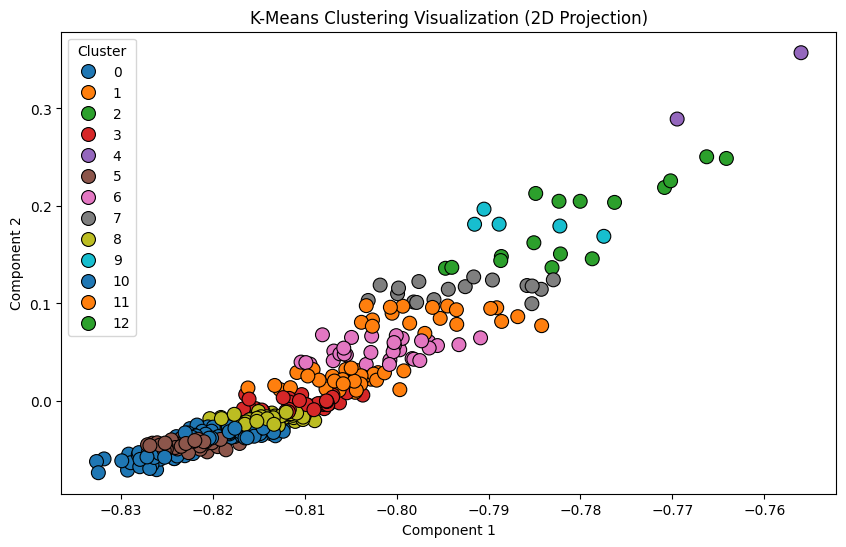

Finished displaying at: 2025-03-09 15:54:41 

Finished executing at: 2025-03-09 15:54:41 



In [557]:
best_combination, best_Sil, best_WSS = run_combinations(13, best_combination, best_Sil, best_WSS)

In [ ]:
# Convert to DataFrame for easy export
results_df = pd.DataFrame(results, columns=['k', 'Vectorizer Type', 'vector_size', 'window', 'Epochs Count', 'Vectorizer Name', 'Silhouette Score', 'WSS Score'])

# Save results
results_df.to_csv("clustering_results.csv", index=False)

# Open the file automatically
os.startfile("clustering_results.csv")

results_df

,k,Vectorizer Type,vector_size,window,Epochs Count,Vectorizer Name,Silhouette Score,WSS Score
0,5,Word2Vec,50,3,50,Skipgram,0.116009,2.183316
1,5,Word2Vec,100,3,50,Skipgram,0.112847,2.128133
2,5,Word2Vec,150,3,50,Skipgram,0.114943,2.093511
3,5,Word2Vec,200,3,50,Skipgram,0.134460,1.939205
4,5,Word2Vec,250,3,50,Skipgram,0.109624,2.029609
5,5,Word2Vec,300,3,50,Skipgram,0.108978,2.091297
6,9,Word2Vec,50,3,50,Skipgram,0.084927,1.958860
7,9,Word2Vec,100,3,50,Skipgram,0.084736,1.926894
8,9,Word2Vec,150,3,50,Skipgram,0.099442,1.794946
9,9,Word2Vec,200,3,50,Skipgram,0.094804,1.692001


In [559]:
# Convert to DataFrame for easy export
wss_scores_df = pd.DataFrame(wss_scores, columns=['k', 'Average WSS Score'])

wss_scores_df

,k,Average WSS Score
0,5,2.077512
1,9,1.796874
2,13,1.644536


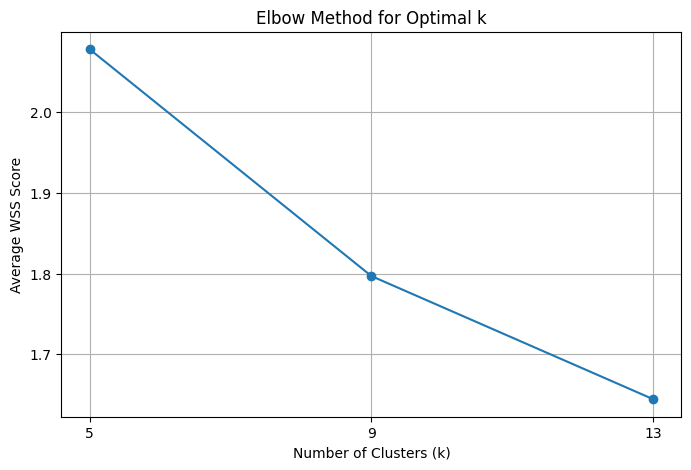

In [560]:
# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(wss_scores_df['k'], wss_scores_df['Average WSS Score'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average WSS Score")
plt.title("Elbow Method for Optimal k")
plt.xticks(wss_scores_df['k'])  # Ensure all k values are shown on x-axis
plt.grid(True)

# Show the plot
plt.show()

In [561]:
best_combination # vector size, window size, epoch

[13, 'word', 'Skipgram', 300, 3, 50, 0.09102542, 1.5207688808441162]